<a href="https://colab.research.google.com/github/trabelsinour266-commits/PricePredictor/blob/main/PricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
df = pd.read_csv(url)
print("Aperçu des 5 premières lignes des données :")
display(df.head())

Aperçu des 5 premières lignes des données :


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
# 1. Y a-t-il des trous ? (Valeurs manquantes / NaN)
print("--- Valeurs manquantes ---")
print(df.isnull().sum())
# Si vous voyez des 0 partout, c'est propre.
# Sinon, il faut soit supprimer les lignes, soit remplir les trous (avec la moyenne).

# 2. Y a-t-il des doublons ? (Lignes identiques)
print("\n--- Doublons ---")
print(df.duplicated().sum())
# Si > 0, il faut faire df.drop_duplicates()

# 3. Y a-t-il des incohérences ? (Statistiques)
print("\n--- Statistiques ---")
display(df.describe())

--- Valeurs manquantes ---
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

--- Doublons ---
0

--- Statistiques ---


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
print("--- Avant suppression du plafond ---")
print(df.shape) # Affiche le nombre de lignes

# On ne garde que les maisons dont le prix est strictement inférieur à 500 000
df = df[df['median_house_value'] < 500000]

print("\n--- Après suppression du plafond ---")
print(df.shape) # Vous verrez que quelques centaines de lignes ont disparu

--- Avant suppression du plafond ---
(20640, 10)

--- Après suppression du plafond ---
(19648, 10)


In [23]:
mediane = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mediane)
df = df.drop("ocean_proximity", axis=1)
print("La colonne 'ocean_proximity' a été retirée.")

La colonne 'ocean_proximity' a été retirée.


In [24]:
#Vérification finale
print("\n--- Vérification après nettoyage ---")
print(df.isnull().sum()) # Tout doit être à 0 maintenant


--- Vérification après nettoyage ---
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [25]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)

0.600143734502368


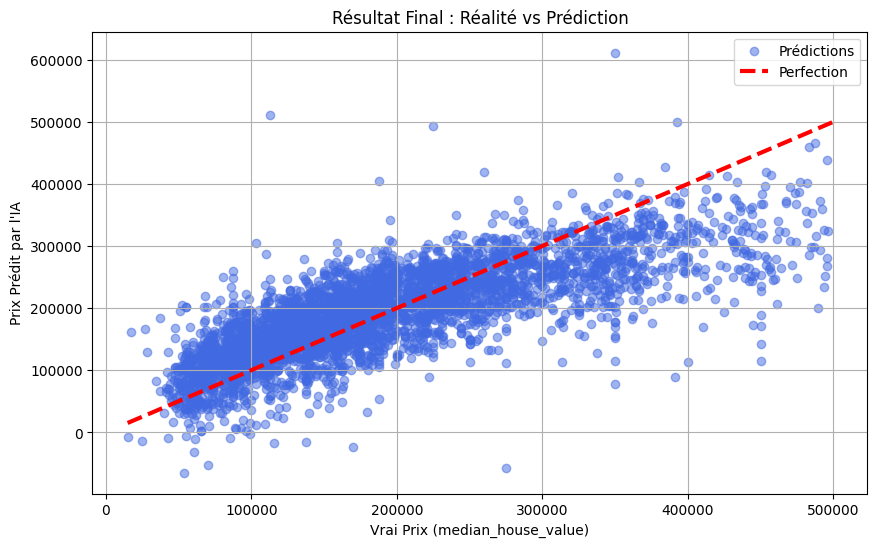

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue', label='Prédictions')
# On dessine la ligne rouge de perfection (Diagonale)
# Elle va du prix minimum au prix maximum
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3, label='Perfection')

# Titres et légendes
plt.xlabel("Vrai Prix (median_house_value)")
plt.ylabel("Prix Prédit par l'IA")
plt.title("Résultat Final : Réalité vs Prédiction")
plt.legend()
plt.grid(True)

# Affichage
plt.show()

Entraînement de la Super IA en cours... (ça peut prendre quelques secondes)


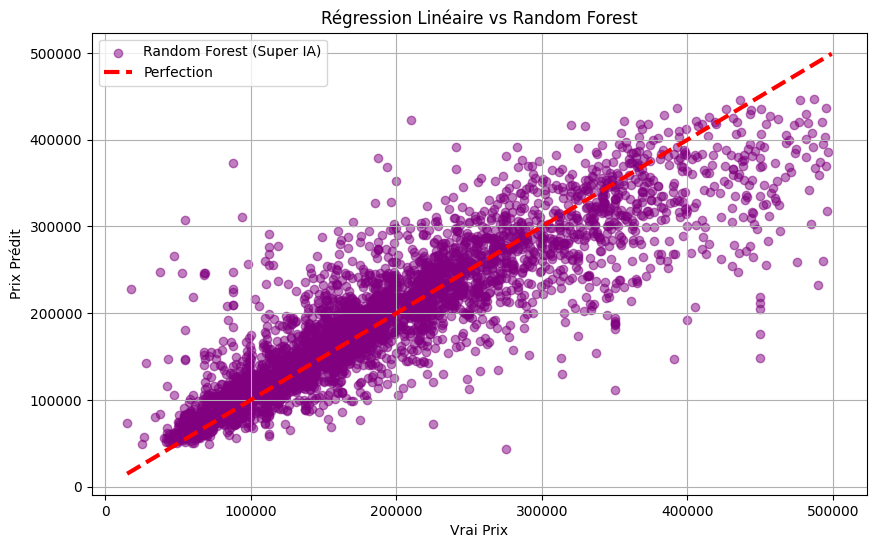

Score de précision : 0.78 (sur 1.0)


In [29]:
from sklearn.ensemble import RandomForestRegressor

# 1. On crée le modèle "Forêt Aléatoire" (100 arbres de décision)
print("Entraînement de la Super IA en cours... (ça peut prendre quelques secondes)")
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. On l'entraîne sur vos données PROPRES
forest_model.fit(X_train, y_train)

# 3. On teste
y_pred_forest = forest_model.predict(X_test)

# 4. On admire le résultat
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, alpha=0.5, color='purple', label='Random Forest (Super IA)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3, label='Perfection')
plt.xlabel("Vrai Prix")
plt.ylabel("Prix Prédit")
plt.title("Régression Linéaire vs Random Forest")
plt.legend()
plt.grid(True)
plt.show()

# Petit bonus : On calcule le score de précision (R²)
score = forest_model.score(X_test, y_test)
print(f"Score de précision : {score:.2f} (sur 1.0)")